In [1]:
from pathlib import Path

obj_dir = Path("..").resolve() / "bcc" / "libbpf-tools" / ".output"

In [2]:
from depsurf import parse_structs

parse_structs(obj_dir / "bindsnoop.bpf.o")

[bpftool.py:26] INFO: /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.btf already exists
[bpftool.py:48] INFO: /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.h already exists
[bpftool.py:48] INFO: /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.txt already exists
[bpftool.py:48] INFO: /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.json already exists
[normalize.py:161] INFO: /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.jsonl already exists
[normalize.py:162] INFO: /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.pkl already exists
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.pkl


['in6_addr', 'sock', 'sock_common', 'socket', 'inet_sock']

In [3]:
from depsurf import parse_hooks

parse_hooks(obj_dir / "bindsnoop.bpf.o")

{('kprobe', 'inet6_bind'), ('kprobe', 'inet_bind')}

In [4]:
result = {}


for obj_file in sorted(obj_dir.glob("*.bpf.o")):
    hooks = parse_hooks(obj_file)
    structs = parse_structs(obj_file, overwrite=True)
    result[obj_file.name.removesuffix(".bpf.o")] = (hooks, structs)

result.keys()

[system.py:19] INFO: Running command: "/usr/lib/linux-tools/6.2.0-39-generic/bpftool -d gen min_core_btf /sys/kernel/btf/vmlinux /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bashreadline.bpf.min.btf /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bashreadline.bpf.o"
libbpf: CO-RE relocating [10] struct user_pt_regs: found target candidate [2215] struct user_pt_regs in [vmlinux]
libbpf: prog 'uretprobe/readline': relo #0: <byte_off> [10] struct user_pt_regs.regs[0] (0:0:0 @ offset 0)
libbpf: prog 'uretprobe/readline': relo #0: matching candidate #0 <byte_off> [2215] struct user_pt_regs.regs[0] (0:0:0 @ offset 0)
[system.py:19] INFO: Running command: "/usr/lib/linux-tools/6.2.0-39-generic/bpftool btf dump file /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bashreadline.bpf.min.btf format c > /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bashreadline.bpf.min.h"
[system.py:19] INFO: Running command: "/usr/lib/linux-tools/6.2.0-39-generic/bp

dict_keys(['bashreadline', 'bindsnoop', 'biolatency', 'biopattern', 'biosnoop', 'biostacks', 'biotop', 'bitesize', 'cachestat', 'capable', 'cpudist', 'cpufreq', 'drsnoop', 'execsnoop', 'exitsnoop', 'filelife', 'filetop', 'fsdist', 'fsslower', 'funclatency', 'futexctn', 'gethostlatency', 'hardirqs', 'javagc', 'klockstat', 'ksnoop', 'llcstat', 'mdflush', 'memleak', 'mountsnoop', 'numamove', 'offcputime', 'oomkill', 'opensnoop', 'profile', 'readahead', 'runqlat', 'runqlen', 'runqslower', 'sigsnoop', 'slabratetop', 'softirqs', 'solisten', 'statsnoop', 'syscount', 'tcpconnect', 'tcpconnlat', 'tcplife', 'tcppktlat', 'tcprtt', 'tcpstates', 'tcpsynbl', 'tcptop', 'tcptracer', 'vfsstat', 'wakeuptime'])

In [5]:
from depsurf import BTF, get_all_x86_paths

btfs = [BTF(p) for p in get_all_x86_paths()]

[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/16.04-x86/btf/4.4.0-210-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/16.04-x86/btf/4.8.0-58-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/16.04-x86/btf/4.10.0-42-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/16.04-x86/btf/4.13.0-45-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/18.04-x86/btf/4.15.0-213-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/18.04-x86/btf/4.18.0-25-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/18.04-x86/btf/5.0.0-65-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/18.04-x86/btf/5.3.0-76-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-study/btf/data/18.04-x86/btf/5.4.0-150-generic.pkl
[btf.py:15] INFO: Loading /Users/szhong/Downloads/bpf-stu

In [ ]:
from depsurf import Kind, KernelImages

imgs = KernelImages(btfs)

print(imgs.get_changes(Kind.STRUCT, "inet_sock"))
print(imgs.get_changes(Kind.FUNC, "blk_account_io_start"))

print(imgs.get_versions(Kind.STRUCT, "renamedata"))
print(imgs.get_versions(Kind.FUNC, "do_page_cache_ra"))

[('4.10', '4.13', Field added          ==> Compiler error
	defer_connect           : __u8
), ('5.8', '5.11', Field added          ==> Compiler error
	recverr_rfc4884         : __u8
), ('5.11', '5.13', Field removed        ==> Compiler error
	rx_dst_ifindex          : int
), ('5.19', '6.2', Field added          ==> Compiler error
	local_port_range        : struct (anon)
Field type changed   ==> Silent error
	inet_id                 : __u16  ->  atomic_t
)]
[('5.4', '5.8', Param removed        ==> Silent error
	new_io                  : bool
)]
['5.13', '5.15', '5.19', '6.2', '6.5']
['5.11', '5.13', '5.15']


In [ ]:
import pickle

with open("subroutine_info.pkl", "rb") as f:
    subroutine_info = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'subroutine_info.pkl'

In [ ]:
subroutine_info["do_execve"]

defaultdict(depsurf.dwarf.traverser.SubroutineEntry,
            {'do_execve': SubroutineEntry(external=True, caller_inline=['__arm64_sys_execve'], caller_func=['run_init_process', 'call_usermodehelper_exec_async'])})

In [ ]:
from depsurf import reload_depsurf

reload_depsurf()

from depsurf import Scorer, Causes, FileLogger, KernelImages, OUTPUT_PATH

imgs = KernelImages(btfs)


total_causes = Causes()

scores = []
for name, (hooks, structs) in result.items():
    with FileLogger(OUTPUT_PATH / "bcc" / f"{name}.txt"):
        print(f"{' ' + name + ' ':=^80}")
        scorer = Scorer(imgs, subroutine_info)
        causes = scorer.analyze(hooks, structs, nindent=0)
        score = causes.print(nindent=0)
        scores.append(
            {
                "name": name,
                "score": score,
                "hooks": len(hooks),
                "structs": len(structs),
            }
        )
        total_causes.merge(causes)
        print()


total_causes.print()

Summary
	Function unavailable  857 times ==> Runtime error
	Field added          2476 times ==> Compiler error
	Field removed        1232 times ==> Compiler error
	Field type changed    635 times ==> Silent error
	Struct unavailable    136 times ==> Compiler error
	Param added            29 times ==> Silent error
	Param removed          25 times ==> Silent error
	Partial inline         13 times ==> Silent error
	Param reordered         7 times ==> Silent error
	Static function         6 times ==> Runtime error
	Param type changed      5 times ==> Silent error
	Return type changed     3 times ==> Silent error


In [ ]:
import pandas as pd

from depsurf import category_map

df = pd.DataFrame(scores)
df = df.sort_values("score", ascending=False)
df["category"] = df.name.map(lambda x: category_map[x].value)
df = df[df.score > 0]
df

,name,score,hooks,structs,category


Text(0.5, 1.0, 'Unstable Score of BPF Programs (lower is better)')

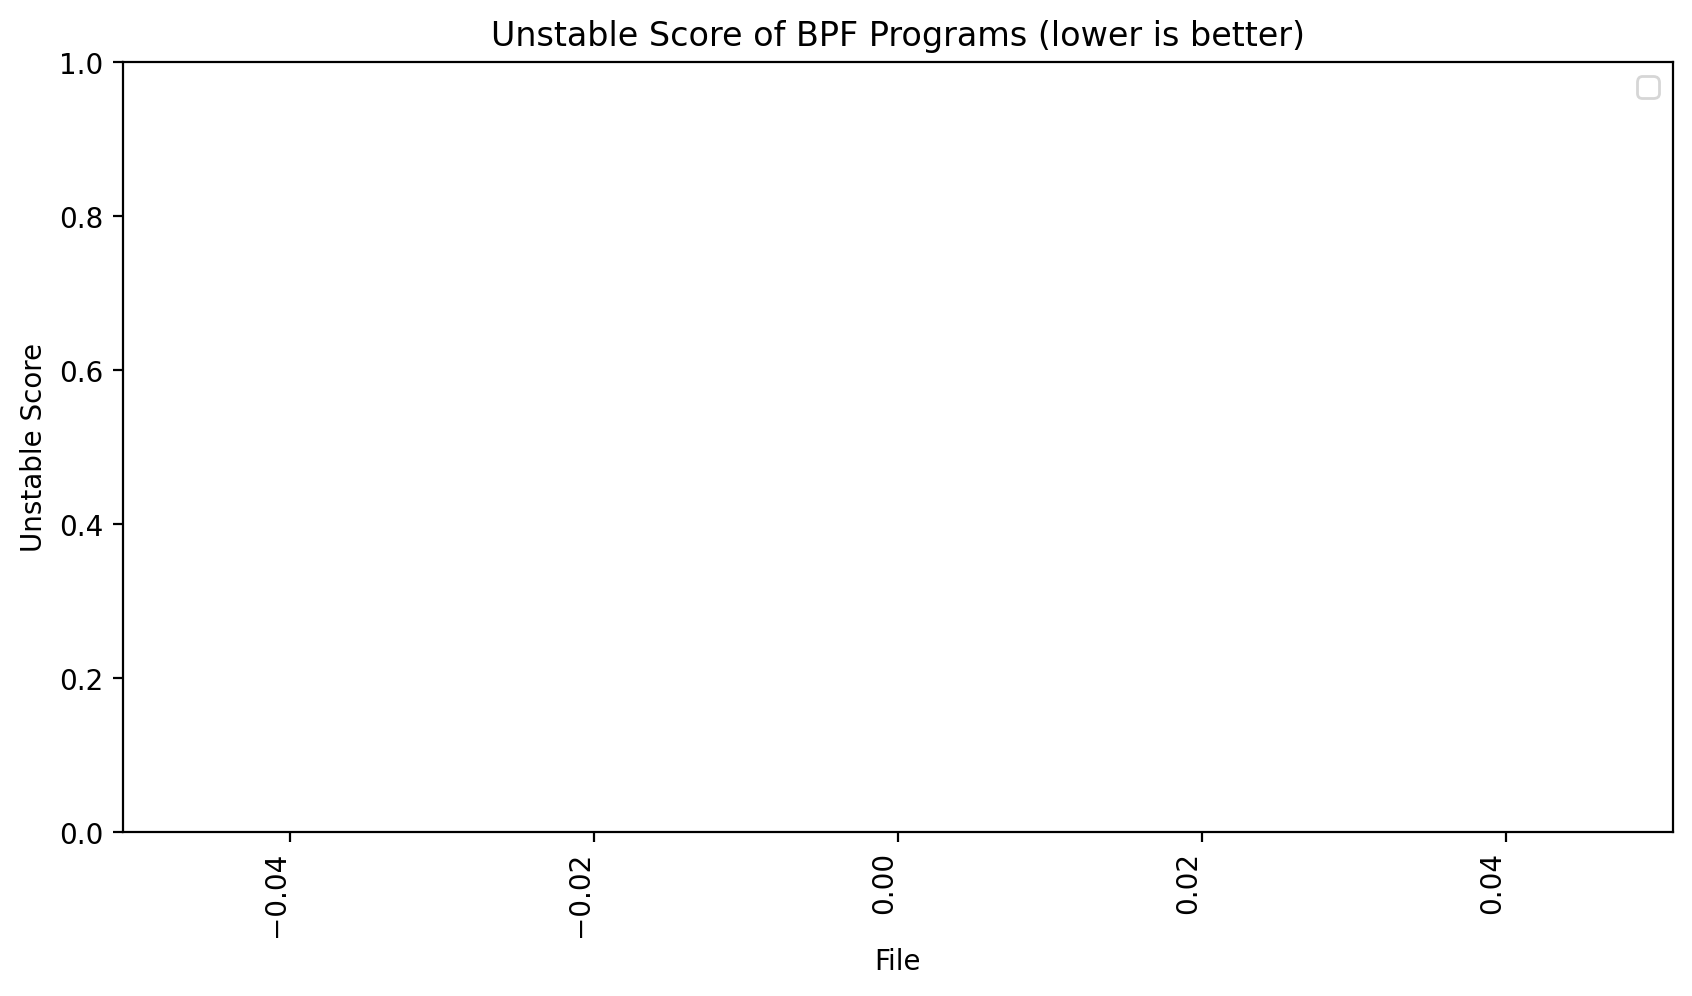

In [ ]:
import matplotlib.pyplot as plt
from depsurf import Category

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)

# remove margin for the bar plot
plt.margins(x=0.01)

curr_x = 0
for category, cat_df in df.groupby("category"):
    color = Category(category).color
    ax.bar(cat_df.name, cat_df["score"], color=color, label=category)
    xlen = len(cat_df) / len(df)
    ax.axhline(
        cat_df["score"].mean(),
        linestyle="--",
        xmin=curr_x,
        xmax=curr_x + xlen,
        color="black",
        linewidth=1,
    )
    curr_x += xlen


handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

for label in ax.get_xticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("right")

ax.set_ylabel("Unstable Score")
ax.set_xlabel("File")
ax.set_title("Unstable Score of BPF Programs (lower is better)")